# Regression Week 4: Ridge Regression (interpretation)

In this notebook, we will run ridge regression multiple times with different L2 penalties to see which one produces the best fit. We will revisit the example of polynomial regression as a means to see the effect of L2 regularization. In particular, we will:
* Use a pre-built implementation of regression (Turi Create) to run polynomial regression
* Use matplotlib to visualize polynomial regressions
* Use a pre-built implementation of regression (Turi Create) to run polynomial regression, this time with L2 penalty
* Use matplotlib to visualize polynomial regressions under L2 regularization
* Choose best L2 penalty using cross-validation.
* Assess the final fit using test data.

We will continue to use the House data from previous notebooks.  (In the next programming assignment for this module, you will implement your own ridge regression learning algorithm using gradient descent.)

# Fire up Turi Create

In [1]:
import turicreate as tc
import math
import random
import numpy
from random import seed
from random import Random
from turicreate import SFrame

# Polynomial regression, revisited

We build on the material from Week 3, where we wrote the function to produce an SFrame with columns containing the powers of a given input. Copy and paste the function `polynomial_sframe` from Week 3:

In [2]:
def polynomial_sframe(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    poly_sframe = tc.SFrame()
    
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_sframe['power_1'] = feature

    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree+1): #en el rango de 2 a 4 [2 y 3]
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # then assign poly_sframe[name] to the appropriate power of feature
            tmp = feature.apply(lambda x: x**power)
            poly_sframe[name] = tmp

    return poly_sframe
    

Let's use matplotlib to visualize what a polynomial regression looks like on the house data.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
sales = tc.SFrame('home_data.sframe/')

In [5]:
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900.0,3.0,1.0,1180.0,5650.0,1.0,0
6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242.0,2.0,0
5631500400,2015-02-25 00:00:00+00:00,180000.0,2.0,1.0,770.0,10000.0,1.0,0
2487200875,2014-12-09 00:00:00+00:00,604000.0,4.0,3.0,1960.0,5000.0,1.0,0
1954400510,2015-02-18 00:00:00+00:00,510000.0,3.0,2.0,1680.0,8080.0,1.0,0
7237550310,2014-05-12 00:00:00+00:00,1225000.0,4.0,4.5,5420.0,101930.0,1.0,0
1321400060,2014-06-27 00:00:00+00:00,257500.0,3.0,2.25,1715.0,6819.0,2.0,0
2008000270,2015-01-15 00:00:00+00:00,291850.0,3.0,1.5,1060.0,9711.0,1.0,0
2414600126,2015-04-15 00:00:00+00:00,229500.0,3.0,1.0,1780.0,7470.0,1.0,0
3793500160,2015-03-12 00:00:00+00:00,323000.0,3.0,2.5,1890.0,6560.0,2.0,0


As in Week 3, we will use the sqft_living variable. For plotting purposes (connecting the dots), you'll need to sort by the values of sqft_living. For houses with identical square footage, we break the tie by their prices.

In [6]:
sales = sales.sort(['sqft_living','price'])

In [7]:
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
3980300371,2014-09-26 00:00:00+00:00,142000.0,0.0,0.0,290.0,20875.0,1.0,0
2856101479,2014-07-01 00:00:00+00:00,276000.0,1.0,0.75,370.0,1801.0,1.0,0
1723049033,2014-06-20 00:00:00+00:00,245000.0,1.0,0.75,380.0,15000.0,1.0,0
1222029077,2014-10-29 00:00:00+00:00,265000.0,0.0,0.75,384.0,213444.0,1.0,0
6896300380,2014-10-02 00:00:00+00:00,228000.0,0.0,1.0,390.0,5900.0,1.0,0
9266700190,2015-05-11 00:00:00+00:00,245000.0,1.0,1.0,390.0,2000.0,1.0,0
6303400395,2015-01-30 00:00:00+00:00,325000.0,1.0,0.75,410.0,8636.0,1.0,0
4322200105,2015-03-31 00:00:00+00:00,229050.0,1.0,1.0,420.0,3298.0,1.0,0
7549801385,2014-06-12 00:00:00+00:00,280000.0,1.0,0.75,420.0,6720.0,1.0,0
8658300340,2014-05-23 00:00:00+00:00,80000.0,1.0,0.75,430.0,5050.0,1.0,0


Create a function that prints the polynomial coefficients in a pretty way :)

In [8]:
def print_coefficients(model):    
    # Get the degree of the polynomial
    deg = len(model.coefficients['value'])-1

    # Get learned parameters as a list
    w = list(model.coefficients['value'])

    # Numpy has a nifty function to print out polynomials in a pretty way
    # (We'll use it, but it needs the parameters in the reverse order)
    print ('Learned polynomial for degree ' + str(deg) + ':')
    w.reverse()
    print (numpy.poly1d(w))

Let us revisit the 15th-order polynomial model using the 'sqft_living' input. Generate polynomial features up to degree 15 using `polynomial_sframe()` and fit a model with these features. When fitting the model, use an L2 penalty of `1e-5`:

In [9]:
l2_small_penalty = 1e-5

poly15_data = polynomial_sframe(sales['sqft_living'], 15)
my_features = poly15_data.column_names() # get the name of the features
poly15_data['price'] = sales['price'] # add price to the data since it's the target
model15= tc.linear_regression.create(poly15_data,
                                     target = 'price',
                                     features = my_features,
                                     l2_penalty=l2_small_penalty,
                                     validation_set=None, verbose = False)

In [10]:
poly15_data

power_1,power_2,power_3,power_4,power_5,power_6,power_7
290.0,84100.0,24389000.0,7072810000.0,2051114900000.0,594823321000000.0,1.7249876309e+17
370.0,136900.0,50653000.0,18741610000.0,6934395700000.0,2565726409000000.0,9.4931877133e+17
380.0,144400.0,54872000.0,20851360000.0,7923516800000.0,3010936384000000.0,1.14415582592e+18
384.0,147456.0,56623104.0,21743271936.0,8349416423424.0,3206175906594816.0,1.2311715481324093e+18
390.0,152100.0,59319000.0,23134410000.0,9022419900000.0,3518743761000000.0,1.37231006679e+18
390.0,152100.0,59319000.0,23134410000.0,9022419900000.0,3518743761000000.0,1.37231006679e+18
410.0,168100.0,68921000.0,28257610000.0,11585620100000.0,4750104241000000.0,1.94754273881e+18
420.0,176400.0,74088000.0,31116960000.0,13069123200000.0,5489031744000000.0,2.30539333248e+18
420.0,176400.0,74088000.0,31116960000.0,13069123200000.0,5489031744000000.0,2.30539333248e+18
430.0,184900.0,79507000.0,34188010000.0,14700844300000.0,6321363049000000.0,2.71818611107e+18


In [11]:
print_coefficients(model15)

Learned polynomial for degree 15:
           15             14             13             12
1.137e-53 x  - 3.796e-49 x  - 3.658e-46 x  + 6.905e-41 x 
              11            10             9             8
 + 7.228e-37 x  - 7.29e-33 x  - 2.333e-28 x - 4.788e-25 x
              7             6             5             4             3
 + 4.512e-20 x + 1.711e-16 x - 7.772e-12 x + 5.189e-08 x - 0.0001291 x
           2
 + 0.1346 x + 103.1 x + 1.679e+05


Note: When we have so many features and so few data points, the solution can become highly numerically unstable, which can sometimes lead to strange unpredictable results.  Thus, rather than using no regularization, we will introduce a tiny amount of regularization (`l2_penalty=1e-5`) to make the solution numerically stable.  (In lecture, we discussed the fact that regularization can also help with numerical stability, and here we are seeing a practical example.)

With the L2 penalty specified above, fit the model and print out the learned weights.

Hint: make sure to add 'price' column to the new SFrame before calling `turicreate.linear_regression.create()`. Also, make sure Turi Create doesn't create its own validation set by using the option `validation_set=None` in this call.

In [12]:
model15.coefficients

name,index,value,stderr
(intercept),None,167924.8683106338,nan
power_1,None,103.09091982258876,nan
power_2,None,0.13460458520186014,nan
power_3,None,-0.00012907138088840022,nan
power_4,None,5.1892899347229256e-08,nan
power_5,None,-7.771693113356376e-12,nan
power_6,None,1.711447665310959e-16,nan
power_7,None,4.5117800398292624e-20,nan
power_8,None,-4.788383278136755e-25,nan
power_9,None,-2.333436313252247e-28,nan


***QUIZ QUESTION:  What's the learned value for the coefficient of feature `power_1`?***

## R/ 103.090 (137.41233840302974)

# Observe overfitting

Recall from Week 3 that the polynomial fit of degree 15 changed wildly whenever the data changed. In particular, when we split the sales data into four subsets and fit the model of degree 15, the result came out to be very different for each subset. The model had a *high variance*. We will see in a moment that ridge regression reduces such variance. But first, we must reproduce the experiment we did in Week 3.

Recuerde de la semana 3 que el ajuste polinomial de grado 15 cambiaba enormemente cada vez que cambiaban los datos. En particular, cuando dividimos los datos de ventas en cuatro subconjuntos y ajustamos el modelo de grado 15, el resultado resultó ser muy diferente para cada subconjunto. El modelo tenía una varianza alta. Veremos en un momento que la regresión de la cresta reduce tal varianza. Pero primero, debemos reproducir el experimento que hicimos en la semana 3.

First, split the data into split the sales data into four subsets of roughly equal size and call them `set_1`, `set_2`, `set_3`, and `set_4`. Use `.random_split` function and make sure you set `seed=0`. 

In [13]:
(semi_split1, semi_split2) = sales.random_split(.5,seed=0)
(set_1, set_2) = semi_split1.random_split(0.5, seed=0)
(set_3, set_4) = semi_split2.random_split(0.5, seed=0)

Next, fit a 15th degree polynomial on `set_1`, `set_2`, `set_3`, and `set_4`, using 'sqft_living' to predict prices. Print the weights and make a plot of the resulting model.

Hint: When calling `turicreate.linear_regression.create()`, use the same L2 penalty as before (i.e. `l2_small_penalty`).  Also, make sure Turi Create doesn't create its own validation set by using the option `validation_set = None` in this call.

Luego, ajuste un polinomio de grado 15 en set_1, set_2, set_3 y set_4, usando 'sqft_living' para predecir los precios. Imprime los pesos y haz un gráfico del modelo resultante.

Sugerencia: cuando llame a turicreate.linear_regression.create(), use la misma penalización L2 que antes (es decir, l2_small_penalty). Además, asegúrate de que Turi Create no cree su propio conjunto de validación usando la opción validation_set = None en esta llamada.

In [14]:
poly15_set_1 = polynomial_sframe(set_1['sqft_living'], 15)
my_features = poly15_set_1.column_names() # get the name of the features
poly15_set_1['price'] = set_1['price'] # add price to the data since it's the target
model15_set_1= tc.linear_regression.create(poly15_set_1, target = 'price', features = my_features,
                                           l2_penalty=l2_small_penalty, validation_set = None)

poly15_set_2 = polynomial_sframe(set_2['sqft_living'], 15)
my_features = poly15_set_2.column_names() # get the name of the features
poly15_set_2['price'] = set_2['price'] # add price to the data since it's the target
model15_set_2= tc.linear_regression.create(poly15_set_2, target = 'price', features = my_features,
                                            l2_penalty=l2_small_penalty, validation_set = None)

poly15_set_3 = polynomial_sframe(set_3['sqft_living'], 15)
my_features = poly15_set_3.column_names() # get the name of the features
poly15_set_3['price'] = set_3['price'] # add price to the data since it's the target
model15_set_3= tc.linear_regression.create(poly15_set_3, target = 'price', features = my_features,
                                            l2_penalty=l2_small_penalty, validation_set = None)

poly15_set_4 = polynomial_sframe(set_4['sqft_living'], 15)
my_features = poly15_set_4.column_names() # get the name of the features
poly15_set_4['price'] = set_4['price'] # add price to the data since it's the target
model15_set_4= tc.linear_regression.create(poly15_set_4, target = 'price', features = my_features,
                                            l2_penalty=l2_small_penalty, validation_set = None)


Linear regression:

--------------------------------------------------------

Number of examples          : 5404

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.021545     | 2191984.900834     | 248699.117253                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 5398

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.015083     | 1975178.190550     | 234533.610645                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 5409

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.021966     | 2283722.685233     | 251097.728054                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 5402

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.017890     | 2378292.373331     | 244341.293208                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [15]:
print (model15_set_1.coefficients)
print (model15_set_2.coefficients)
print (model15_set_3.coefficients)
print (model15_set_4.coefficients)

+-------------+-------+------------------------+-----------------------+
|     name    | index |         value          |         stderr        |
+-------------+-------+------------------------+-----------------------+
| (intercept) |  None |   9306.460738574853    |          nan          |
|   power_1   |  None |   585.8658227918767    |          nan          |
|   power_2   |  None |  -0.39730589492643253  |          nan          |
|   power_3   |  None | 0.00014147090040698705 |          nan          |
|   power_4   |  None | -1.529459910633883e-08 |          nan          |
|   power_5   |  None | -3.797562554472397e-13 |          nan          |
|   power_6   |  None | 5.974816422113205e-17  |          nan          |
|   power_7   |  None | 1.068885079424125e-20  | 9.827796414259983e-17 |
|   power_8   |  None | 1.5934406685250742e-25 |          nan          |
|   power_9   |  None | -6.928348684589336e-29 |          nan          |
+-------------+-------+------------------------+---

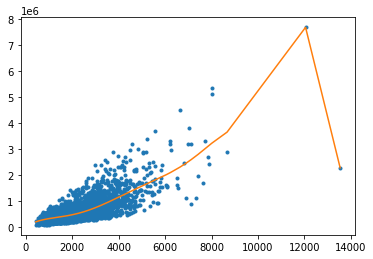

In [16]:
plt.plot(poly15_set_1['power_1'],poly15_set_1['price'],'.',
         poly15_set_1['power_1'], model15_set_1.predict(poly15_set_1),'-')

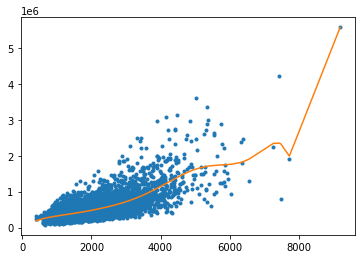

In [17]:
plt.plot(poly15_set_2['power_1'],poly15_set_2['price'],'.',
         poly15_set_2['power_1'], model15_set_2.predict(poly15_set_2),'-')

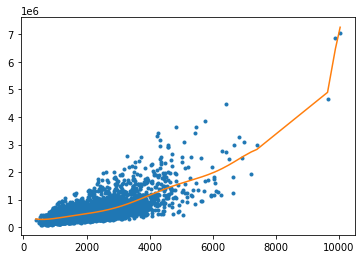

In [18]:
plt.plot(poly15_set_3['power_1'],poly15_set_3['price'],'.',
         poly15_set_3['power_1'], model15_set_3.predict(poly15_set_3),'-')

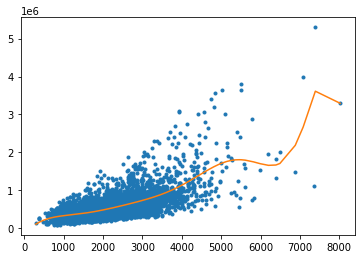

In [19]:
plt.plot(poly15_set_4['power_1'],poly15_set_4['price'],'.',
         poly15_set_4['power_1'], model15_set_4.predict(poly15_set_4),'-')

The four curves should differ from one another a lot, as should the coefficients you learned.

***QUIZ QUESTION:  For the models learned in each of these training sets, what are the smallest and largest values you learned for the coefficient of feature `power_1`?***  (For the purpose of answering this question, negative numbers are considered "smaller" than positive numbers. So -5 is smaller than -3, and -3 is smaller than 5 and so forth.)

## R/ smaller -681.700049925378 (set 3) - largest 1250.931322816395 (set 4)

## 585.8658227918767 ;  783.4938272804999 ; -759.251823483348 ; 1247.5903831275245 

# Ridge regression comes to rescue

Generally, whenever we see weights change so much in response to change in data, we believe the variance of our estimate to be large. Ridge regression aims to address this issue by penalizing "large" weights. (Weights of `model15` looked quite small, but they are not that small because 'sqft_living' input is in the order of thousands.)

With the argument `l2_penalty=1e5`, fit a 15th-order polynomial model on `set_1`, `set_2`, `set_3`, and `set_4`. Other than the change in the `l2_penalty` parameter, the code should be the same as the experiment above. Also, make sure Turi Create doesn't create its own validation set by using the option `validation_set = None` in this call.

Generalmente, cada vez que vemos que los pesos cambian tanto en respuesta a cambios en los datos, creemos que la varianza de nuestra estimación es grande. La regresión ridge tiene como objetivo abordar este problema al penalizar los pesos "grandes". (Los pesos del modelo 15 parecían bastante pequeños, pero no son tan pequeños porque la entrada 'sqft_living' es del orden de miles).

Con el argumento l2_penalty=1e5, ajuste un modelo polinómico de orden 15 en set_1, set_2, set_3 y set_4. Aparte del cambio en el parámetro l2_penalty, el código debe ser el mismo que el del experimento anterior. Además, asegúrate de que Turi Create no cree su propio conjunto de validación usando la opción validation_set = None en esta llamada.

In [20]:
l2_new_penalty = 1e5

poly15_set_1 = polynomial_sframe(set_1['sqft_living'], 15)
my_features = poly15_set_1.column_names() # get the name of the features
poly15_set_1['price'] = set_1['price'] # add price to the data since it's the target
model15_set_1= tc.linear_regression.create(poly15_set_1, target = 'price', features = my_features,
                                           l2_penalty=l2_new_penalty, validation_set = None)

poly15_set_2 = polynomial_sframe(set_2['sqft_living'], 15)
my_features = poly15_set_2.column_names() # get the name of the features
poly15_set_2['price'] = set_2['price'] # add price to the data since it's the target
model15_set_2= tc.linear_regression.create(poly15_set_2, target = 'price', features = my_features,
                                            l2_penalty=l2_new_penalty, validation_set = None)

poly15_set_3 = polynomial_sframe(set_3['sqft_living'], 15)
my_features = poly15_set_3.column_names() # get the name of the features
poly15_set_3['price'] = set_3['price'] # add price to the data since it's the target
model15_set_3= tc.linear_regression.create(poly15_set_3, target = 'price', features = my_features,
                                            l2_penalty=l2_new_penalty, validation_set = None)

poly15_set_4 = polynomial_sframe(set_4['sqft_living'], 15)
my_features = poly15_set_4.column_names() # get the name of the features
poly15_set_4['price'] = set_4['price'] # add price to the data since it's the target
model15_set_4= tc.linear_regression.create(poly15_set_4, target = 'price', features = my_features,
                                            l2_penalty=l2_new_penalty, validation_set = None)


Linear regression:

--------------------------------------------------------

Number of examples          : 5404

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.023515     | 5978778.434729     | 374261.720860                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 5398

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.019387     | 2984894.541944     | 323238.809634                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 5409

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.026889     | 3695342.767093     | 350033.521294                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 5402

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.018514     | 3601895.280124     | 323111.582889                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [21]:
print (model15_set_1.coefficients)
print (model15_set_2.coefficients)
print (model15_set_3.coefficients)
print (model15_set_4.coefficients)

+-------------+-------+------------------------+------------------------+
|     name    | index |         value          |         stderr         |
+-------------+-------+------------------------+------------------------+
| (intercept) |  None |   530317.0245158835    |          nan           |
|   power_1   |  None |   2.5873887567286866   |          nan           |
|   power_2   |  None | 0.0012741440059211371  |          nan           |
|   power_3   |  None | 1.7493422693158899e-07 |          nan           |
|   power_4   |  None | 1.0602211909664251e-11 |          nan           |
|   power_5   |  None | 5.422476044821804e-16  |          nan           |
|   power_6   |  None | 2.895638283427737e-20  |          nan           |
|   power_7   |  None | 1.6500066635095529e-24 | 1.4789630292567112e-16 |
|   power_8   |  None | 9.860815284092932e-29  |          nan           |
|   power_9   |  None |  6.06589348254357e-33  |          nan           |
+-------------+-------+---------------

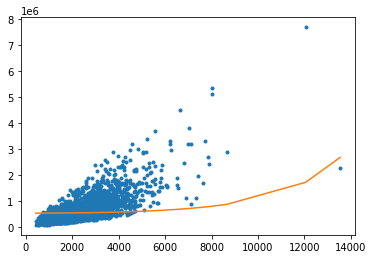

In [22]:
plt.plot(poly15_set_1['power_1'],poly15_set_1['price'],'.',
         poly15_set_1['power_1'], model15_set_1.predict(poly15_set_1),'-')

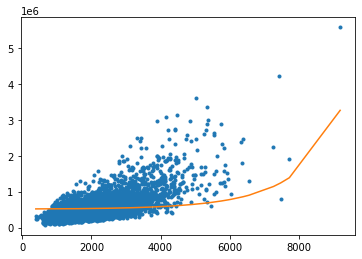

In [23]:
plt.plot(poly15_set_2['power_1'],poly15_set_2['price'],'.',
         poly15_set_2['power_1'], model15_set_2.predict(poly15_set_2),'-')

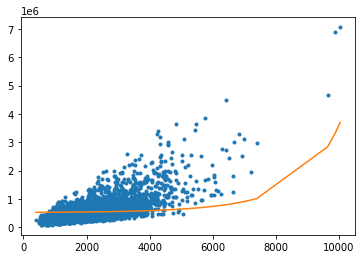

In [24]:
plt.plot(poly15_set_3['power_1'],poly15_set_3['price'],'.',
         poly15_set_3['power_1'], model15_set_3.predict(poly15_set_3),'-')

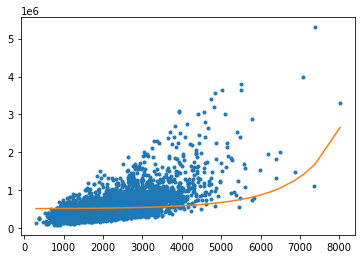

In [25]:
plt.plot(poly15_set_4['power_1'],poly15_set_4['price'],'.',
         poly15_set_4['power_1'], model15_set_4.predict(poly15_set_4),'-')

These curves should vary a lot less, now that you applied a high degree of regularization.

***QUIZ QUESTION:  For the models learned with the high level of regularization in each of these training sets, what are the smallest and largest values you learned for the coefficient of feature `power_1`?*** (For the purpose of answering this question, negative numbers are considered "smaller" than positive numbers. So -5 is smaller than -3, and -3 is smaller than 5 and so forth.)

## R/ smaller 1.9104093824432022 (set 4) - largest 2.5873887567286866 (set 1)

# Selecting an L2 penalty via cross-validation

Just like the polynomial degree, the L2 penalty is a "magic" parameter we need to select. We could use the validation set approach as we did in the last module, but that approach has a major disadvantage: it leaves fewer observations available for training. **Cross-validation** seeks to overcome this issue by using all of the training set in a smart way.

We will implement a kind of cross-validation called **k-fold cross-validation**. The method gets its name because it involves dividing the training set into k segments of roughtly equal size. Similar to the validation set method, we measure the validation error with one of the segments designated as the validation set. The major difference is that we repeat the process k times as follows:

Set aside segment 0 as the validation set, and fit a model on rest of data, and evalutate it on this validation set<br>
Set aside segment 1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set<br>
...<br>
Set aside segment k-1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set

After this process, we compute the average of the k validation errors, and use it as an estimate of the generalization error. Notice that  all observations are used for both training and validation, as we iterate over segments of data. 

To estimate the generalization error well, it is crucial to shuffle the training data before dividing them into segments. The package turicreate_cross_validation (see below) has a utility function for shuffling a given SFrame. We reserve 10% of the data as the test set and shuffle the remainder. (Make sure to use `seed=1` to get consistent answer.)

  
_Note:_ For applying cross-validation, we will import a package called `turicreate_cross_validation`. To install it, please run this command on your terminal:

`pip install -e git+https://github.com/Kagandi/turicreate-cross-validation.git#egg=turicreate_cross_validation`

You can find the documentation on this package here: https://github.com/Kagandi/turicreate-cross-validation

Al igual que el grado del polinomio, la penalización L2 es un parámetro "mágico" que debemos seleccionar. Podríamos usar el enfoque del conjunto de validación como lo hicimos en el último módulo, pero ese enfoque tiene una gran desventaja: deja menos observaciones disponibles para el entrenamiento. La validación cruzada busca superar este problema utilizando todo el conjunto de entrenamiento de manera inteligente.

Implementaremos un tipo de validación cruzada llamada validación cruzada k-fold. El método recibe su nombre porque consiste en dividir el conjunto de entrenamiento en k segmentos de aproximadamente el mismo tamaño. Similar al método del conjunto de validación, medimos el error de validación con uno de los segmentos designados como conjunto de validación. La principal diferencia es que repetimos el proceso k veces de la siguiente manera:

Deje a un lado el segmento 0 como el conjunto de validación, ajuste un modelo en el resto de los datos y evalúelo en este conjunto de validación

Deje a un lado el segmento 1 como el conjunto de validación, ajuste un modelo en el resto de los datos y evalúelo en este conjunto de validación

...

Deje a un lado el segmento k-1 como el conjunto de validación, ajuste un modelo en el resto de los datos y evalúelo en este conjunto de validación.

Después de este proceso, calculamos el promedio de los k errores de validación y lo usamos como una estimación del error de generalización. Tenga en cuenta que todas las observaciones se utilizan tanto para el entrenamiento como para la validación, ya que iteramos sobre segmentos de datos.

Para estimar bien el error de generalización, es crucial barajar los datos de entrenamiento antes de dividirlos en segmentos. El paquete turicreate_cross_validation (ver más abajo) tiene una función de utilidad para barajar un SFrame dado. Reservamos el 10 % de los datos como conjunto de prueba y mezclamos el resto. (Asegúrese de usar seed=1 para obtener una respuesta consistente).

Nota: Para aplicar la validación cruzada, importaremos un paquete llamado turicreate_cross_validation. Para instalarlo, ejecute este comando en su terminal:

pip install -e git+https://github.com/Kagandi/turicreate-cross-validation.git#egg=turicreate_cross_validation

Puede encontrar la documentación sobre este paquete aquí: https://github.com/Kagandi/turicreate-cross-validation

In [26]:
import turicreate_cross_validation.cross_validation as tcv

(train_valid, test) = sales.random_split(.9, seed=1)
train_valid_shuffled = tcv.shuffle_sframe(train_valid, random_seed=1)

Once the data is shuffled, we divide it into equal segments. Each segment should receive `n/k` elements, where `n` is the number of observations in the training set and `k` is the number of segments. Since the segment 0 starts at index 0 and contains `n/k` elements, it ends at index `(n/k)-1`. The segment 1 starts where the segment 0 left off, at index `(n/k)`. With `n/k` elements, the segment 1 ends at index `(n*2/k)-1`. Continuing in this fashion, we deduce that the segment `i` starts at index `(n*i/k)` and ends at `(n*(i+1)/k)-1`.

Una vez barajados los datos, los dividimos en segmentos iguales. Cada segmento debe recibir `n/k` elementos, donde `n` es el número de observaciones en el conjunto de entrenamiento y `k` es el número de segmentos. Dado que el segmento 0 comienza en el índice 0 y contiene `n/k` elementos, termina en el índice `(n/k)-1`. El segmento 1 comienza donde lo dejó el segmento 0, en el índice `(n/k)`. Con `n/k` elementos, el segmento 1 termina en el índice `(n*2/k)-1`. Continuando de esta manera, deducimos que el segmento `i` comienza en el índice `(n*i/k)` y termina en `(n*(i+1)/k)-1`.

With this pattern in mind, we write a short loop that prints the starting and ending indices of each segment, just to make sure you are getting the splits right.

Con este patrón en mente, escribimos un ciclo corto que imprime los índices inicial y final de cada segmento, solo para asegurarnos de que está haciendo las divisiones correctas.

In [60]:
n = len(train_valid_shuffled)
k = 10 # 10-fold cross-validation

for i in range(k):
    start = (n*i)/k
    end = (n*(i+1)/k)-1
    print (i, (start, end))

0 (0.0, 1938.6)
1 (1939.6, 3878.2)
2 (3879.2, 5817.8)
3 (5818.8, 7757.4)
4 (7758.4, 9697.0)
5 (9698.0, 11636.6)
6 (11637.6, 13576.2)
7 (13577.2, 15515.8)
8 (15516.8, 17455.4)
9 (17456.4, 19395.0)


In [50]:
n

19396

Let us familiarize ourselves with array slicing with SFrame. To extract a continuous slice from an SFrame, use colon in square brackets. For instance, the following cell extracts rows 0 to 9 of `train_valid_shuffled`. Notice that the first index (0) is included in the slice but the last index (10) is omitted.

Familiaricémonos con el corte de matrices con SFrame. Para extraer un segmento continuo de un SFrame, use dos puntos entre corchetes. Por ejemplo, la siguiente celda extrae las filas 0 a 9 de `train_valid_shuffled`. Tenga en cuenta que el primer índice (0) se incluye en el segmento, pero se omite el último índice (10). 

In [35]:
train_valid_shuffled

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
8645511350,2014-12-01 00:00:00+00:00,300000.0,3.0,1.75,1810.0,21138.0,1.0,0
7237501370,2014-07-17 00:00:00+00:00,1079000.0,4.0,3.25,4800.0,12727.0,2.0,0
7278700100,2015-01-21 00:00:00+00:00,625000.0,4.0,2.5,2740.0,9599.0,1.0,0
1421079007,2015-03-24 00:00:00+00:00,408506.0,3.0,2.75,2480.0,209199.0,1.5,0
4338800370,2014-11-17 00:00:00+00:00,220000.0,3.0,1.0,1000.0,6020.0,1.0,0
7511200020,2014-08-29 00:00:00+00:00,509900.0,3.0,1.75,1690.0,53578.0,1.0,0
3300701615,2014-09-30 00:00:00+00:00,655000.0,4.0,2.5,2630.0,4000.0,3.0,0
7011200260,2014-12-19 00:00:00+00:00,485000.0,4.0,2.0,1400.0,3600.0,1.0,0
3570000130,2014-06-11 00:00:00+00:00,580379.0,4.0,2.75,2240.0,27820.0,1.5,0
2796100640,2015-04-24 00:00:00+00:00,264900.0,4.0,2.5,2040.0,7000.0,1.0,0


In [36]:
train_valid_shuffled[0:10] # rows 0 to 9

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
8645511350,2014-12-01 00:00:00+00:00,300000.0,3.0,1.75,1810.0,21138.0,1.0,0
7237501370,2014-07-17 00:00:00+00:00,1079000.0,4.0,3.25,4800.0,12727.0,2.0,0
7278700100,2015-01-21 00:00:00+00:00,625000.0,4.0,2.5,2740.0,9599.0,1.0,0
1421079007,2015-03-24 00:00:00+00:00,408506.0,3.0,2.75,2480.0,209199.0,1.5,0
4338800370,2014-11-17 00:00:00+00:00,220000.0,3.0,1.0,1000.0,6020.0,1.0,0
7511200020,2014-08-29 00:00:00+00:00,509900.0,3.0,1.75,1690.0,53578.0,1.0,0
3300701615,2014-09-30 00:00:00+00:00,655000.0,4.0,2.5,2630.0,4000.0,3.0,0
7011200260,2014-12-19 00:00:00+00:00,485000.0,4.0,2.0,1400.0,3600.0,1.0,0
3570000130,2014-06-11 00:00:00+00:00,580379.0,4.0,2.75,2240.0,27820.0,1.5,0
2796100640,2015-04-24 00:00:00+00:00,264900.0,4.0,2.5,2040.0,7000.0,1.0,0


Now let us extract individual segments with array slicing. Consider the scenario where we group the houses in the `train_valid_shuffled` dataframe into k=10 segments of roughly equal size, with starting and ending indices computed as above.
Extract the fourth segment (segment 3) and assign it to a variable called `validation4`.

Ahora extraigamos segmentos individuales con corte de matriz. Considere el escenario en el que agrupamos las casas en el dataframe `train_valid_shuffled` en k = 10 segmentos de aproximadamente el mismo tamaño, con índices iniciales y finales calculados como se indicó anteriormente.
Extrae el cuarto segmento (segmento 3) y asígnalo a una variable llamada `validación4`.

In [37]:
validation4 = train_valid_shuffled[5818.8:7757.4]

To verify that we have the right elements extracted, run the following cell, which computes the average price of the fourth segment. When rounded to nearest whole number, the average should be $559,642.

In [39]:
print (int(round(validation4['price'].mean(), 0)))

559642


After designating one of the k segments as the validation set, we train a model using the rest of the data. To choose the remainder, we slice (0:start) and (end+1:n) of the data and paste them together. SFrame has `append()` method that pastes together two disjoint sets of rows originating from a common dataset. For instance, the following cell pastes together the first and last two rows of the `train_valid_shuffled` dataframe.

In [40]:
n = len(train_valid_shuffled)
first_two = train_valid_shuffled[0:2]
last_two = train_valid_shuffled[n-2:n]
print (first_two.append(last_two))

+------------+---------------------------+-----------+----------+-----------+
|     id     |            date           |   price   | bedrooms | bathrooms |
+------------+---------------------------+-----------+----------+-----------+
| 8645511350 | 2014-12-01 00:00:00+00:00 |  300000.0 |   3.0    |    1.75   |
| 7237501370 | 2014-07-17 00:00:00+00:00 | 1079000.0 |   4.0    |    3.25   |
| 4077800582 | 2014-09-12 00:00:00+00:00 |  522000.0 |   3.0    |    1.0    |
| 7853370620 | 2015-02-06 00:00:00+00:00 |  605000.0 |   5.0    |    4.0    |
+------------+---------------------------+-----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    1810.0   | 21138.0  |  1.0   |     0      |  0   |     4     |  7.0  |
|    4800.0   | 12727.0  |  2.0   |     0      |  0   |     3     |  10.

Extract the remainder of the data after *excluding* fourth segment (segment 3) and assign the subset to `train4`.

In [63]:
train4 = train_valid_shuffled[0.0:5818.8].append(train_valid_shuffled[7758.4:n])

To verify that we have the right elements extracted, run the following cell, which computes the average price of the data with fourth segment excluded. When rounded to nearest whole number, the average should be $536,865.

In [64]:
print (int(round(train4['price'].mean(), 0)))

536866


Now we are ready to implement k-fold cross-validation. Write a function that computes k validation errors by designating each of the k segments as the validation set. It accepts as parameters (i) `k`, (ii) `l2_penalty`, (iii) dataframe, (iv) name of output column (e.g. `price`) and (v) list of feature names. The function returns the average validation error using k segments as validation sets.

* For each i in [0, 1, ..., k-1]:
  * Compute starting and ending indices of segment i and call 'start' and 'end'
  * Form validation set by taking a slice (start:end+1) from the data.
  * Form training set by appending slice (end+1:n) to the end of slice (0:start).
  * Train a linear model using training set just formed, with a given l2_penalty
  * Compute validation error using validation set just formed

In [74]:
import numpy as np

def k_fold_cross_validation(k, l2_penalty, data, output_name, features_list):
    empty_vector = np.empty(k) 
    n = len(data)
    
    for i in range(k):
        start = (n*i)/k
        end = (n*(i+1)/k)-1
        #print (i, (start, end))
        validation_set = data[start:end+1]
        train_set = data[0:start].append(data[end+1:n])
        model = tc.linear_regression.create(train_set, target=output_name, features=features_list,
                                           l2_penalty=l2_penalty, validation_set=None, verbose=False)
        predict = model.predict(validation_set)
        errors = validation_set[output_name] - predict
        square_errors = errors ** 2
        RSS = square_errors.sum()
        empty_vector[i] = RSS
        
    return empty_vector.mean()
    #print ('Error Cross Validation' + str(empty_vector.mean()))
    

Once we have a function to compute the average validation error for a model, we can write a loop to find the model that minimizes the average validation error. Write a loop that does the following:
* We will again be aiming to fit a 15th-order polynomial model using the `sqft_living` input
* For `l2_penalty` in [10^1, 10^1.5, 10^2, 10^2.5, ..., 10^7] (to get this in Python, you can use this Numpy function: `np.logspace(1, 7, num=13)`.)
    * Run 10-fold cross-validation with `l2_penalty`
* Report which L2 penalty produced the lowest average validation error.

Note: since the degree of the polynomial is now fixed to 15, to make things faster, you should generate polynomial features in advance and re-use them throughout the loop. Make sure to use `train_valid_shuffled` when generating polynomial features!

In [83]:
poly_data = polynomial_sframe(train_valid_shuffled['sqft_living'], 15)
my_features = poly_data.column_names() # get the name of the features
poly_data['price'] = train_valid_shuffled['price'] # add price to the data since it's the target
a = np.logspace(1, 7, num=13)# crea los valores 10^1, 10^1.5, 10^2, 10^2.5, ..., 10^7
nn = len(a)
error_vector = np.empty(13)
for i in range(nn):
    #print 'l2_penalty: ' + str(l2_penalty)
    
    error_vector[i] = k_fold_cross_validation(10, a[i], poly_data, 'price', my_features)
    
    #print 'error_vector: ' + str(error_vector)

print (error_vector)


[6.24702191e+14 3.59522656e+14 1.82500743e+14 1.24345199e+14
 1.20963608e+14 1.23921949e+14 1.37124115e+14 1.71719393e+14
 2.29172268e+14 2.52982619e+14 2.58749756e+14 2.62867019e+14
 2.64926582e+14]


***QUIZ QUESTIONS:  What is the best value for the L2 penalty according to 10-fold validation?***

In [102]:
error_vector = np.array(error_vector)
a = np.array(a)
indice = error_vector.tolist().index(min(error_vector))
#print(indice, min(error_vector), a[indice])
print ('Lambda with low Error Cross Validation :' + str(a[indice]))
print ('Cross Validation Error :' + str(min(error_vector)))


Lambda with low Error Cross Validation :1000.0
Error Cross Validation :120963607540272.53


You may find it useful to plot the k-fold cross-validation errors you have obtained to better understand the behavior of the method.  

[1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05 3.16227766e+05 1.00000000e+06 3.16227766e+06
 1.00000000e+07]
[6.24702191e+14 3.59522656e+14 1.82500743e+14 1.24345199e+14
 1.20963608e+14 1.23921949e+14 1.37124115e+14 1.71719393e+14
 2.29172268e+14 2.52982619e+14 2.58749756e+14 2.62867019e+14
 2.64926582e+14]


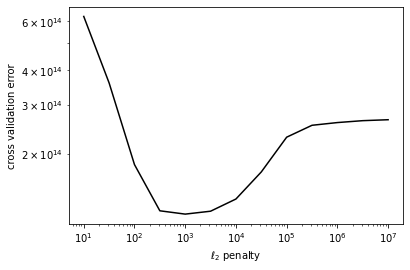

In [103]:
# Plot the l2_penalty values in the x axis and the cross-validation error in the y axis.
# Using plt.xscale('log') will make your plot more intuitive.

plt.plot(a,error_vector,'k-')
plt.xlabel('$\ell_2$ penalty')
plt.ylabel('cross validation error')
plt.xscale('log')
plt.yscale('log')
print (a)
print (error_vector)

Once you found the best value for the L2 penalty using cross-validation, it is important to retrain a final model on all of the training data using this value of `l2_penalty`. This way, your final model will be trained on the entire dataset.

In [104]:
l2_penalty = 1e3
data = polynomial_sframe(train_valid['sqft_living'], 15)
my_features = data.column_names() # get the name of the features
data['price'] = train_valid['price'] # add price to the data since it's the target
final_model = tc.linear_regression.create(data, target = 'price', features = my_features,
                                          l2_penalty=l2_penalty, validation_set = None, verbose=False)

predict = final_model.predict(test)
errors = test['price'] - predict
square_errors = errors ** 2
RSS = square_errors.sum()
print (RSS)

252897427447157.6


***QUIZ QUESTION: Using the best L2 penalty found above, train a model using all training data. What is the RSS on the TEST data of the model you learn with this L2 penalty? ***

In [105]:
print ('RSS on Test data using the best L2 penalty is :' + str(RSS))

RSS on Test data using the best L2 penalty is :252897427447157.6
